In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [2]:
df = pd.read_csv(r'data/derived/Pleiades_df.csv')
df.loc[df['Description'].isna(), 'Description'] = 'Missing'
df = df.dropna()


In [3]:
Roman_title = df[df['Title'].str.lower().str.contains('roman ')]
Roman_decri = df[df['Description'].str.lower().str.contains('a roman ')]
Roman_full = pd.merge(Roman_title, Roman_decri, how = 'outer')



In [4]:
no_places_27bc =len(df[(df['Start_Date']<= -27)& (df['End_Date']>=-27)])
no_roman_places_27bc = len(Roman_full[(Roman_full['Start_Date']<= -27)& (Roman_full['End_Date']>=-27)])
no_places_117 =len(df[(df['Start_Date']<= 117)& (df['End_Date']>=117)])
no_roman_places_117 = len(Roman_full[(Roman_full['Start_Date']<= 117)& (Roman_full['End_Date']>=117)])
no_places_480 =len(df[(df['Start_Date']<= 480)& (df['End_Date']>=480)])
no_roman_places_480 = len(Roman_full[(Roman_full['Start_Date']<= 480)& (Roman_full['End_Date']>=480)])


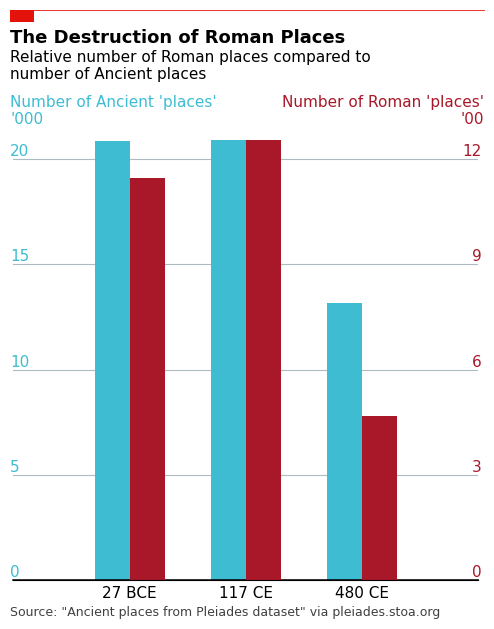

In [5]:

Category = ['27 BCE', '117 CE', '480 CE']

fig, ax1 = plt.subplots(figsize=(6, 6))


X = np.arange(3)
ax2 = ax1.twinx()


ax1.bar(X-0.15, [no_places_27bc, no_places_117, no_places_480], color = '#3EBCD2', width = 0.3, zorder = 2)
ax2.bar(X+0.15, [no_roman_places_27bc, no_roman_places_117, no_roman_places_480], color = '#A81829', width = 0.3, zorder = 2)
ax1.set_xlim(-1,3)

# Zorder tells it which layer to put it on. We are setting this to 1 and our data to 2 so the grid is behind the data.
ax1.grid(which="major", axis='y', color='#758D99', alpha=0.6, zorder=1)

# Remove splines. Can be done one at a time or can slice with a list.
ax1.spines[['top','left', 'right']].set_visible(False)

# Make left spine slightly thicker
ax1.spines[['bottom']].set_linewidth(1.1)

ax2.spines[['top','left', 'right']].set_visible(False)

# Set custom labels for y-axis
ax1.set_yticks([0,5000,10000,15000,20000])
ax1.set_yticklabels([0,5,10,15,20], color = '#3EBCD2',
                    ha = 'left',
                    verticalalignment = 'bottom')

## Hacky scaling
ax2_scale = (5000/no_places_117)*no_roman_places_117
ax2.set_yticks([0,ax2_scale,ax2_scale*2,ax2_scale*3,ax2_scale*4])
ax2.set_yticklabels([0,3,6,9,12], color = '#A81829',
                    ha = 'right',
                    verticalalignment='bottom')

# Reformat y-axis tick labels
ax1.yaxis.set_tick_params(labelleft=True,      # Put x-axis labels on left
                         labelright=False,  # Set no x-axis labels on right
                         left=False,       # Set no ticks on left
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

ax2.yaxis.set_tick_params(labelleft=False,      # Set no x-axis labels on left
                         labelright=True,  # put x-axis labels on right
                         right=False,       # Set no ticks on right
                         labelsize=11,       # Set tick label size
                         pad=-1)             # Lower tick labels a bit

plt.xticks(X, Category) 
ax1.xaxis.set_tick_params(bottom = False, labelsize = 11, pad = 1)

# Add in line and tag
ax2.plot([0.12, .91],                  # Set width of line
        [1.06, 1.06],                  # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax1.add_patch(plt.Rectangle((0.12,1.06),                 # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

# Add in title and subtitle
ax1.text(x=0.12, y=1.005, s="The Destruction of Roman Places", transform=fig.transFigure, ha='left', fontsize=13, weight=700, fontfamily = 'Sans')
ax1.text(x=0.12, y=.945, s="Relative number of Roman places compared to\nnumber of Ancient places", transform=fig.transFigure, ha='left', fontsize=11, weight=400, fontfamily = 'Sans')

ax1.text(x=0.12, y=.87, s="Number of Ancient \'places\' \n'000",color ='#3EBCD2', transform=fig.transFigure, ha='left', weight = 300, fontsize=11, fontfamily = 'Sans')
ax1.text(x=0.91, y=.87, s="Number of Roman \'places\'\n'00",color ='#A81829', transform=fig.transFigure, ha='right', weight = 300, fontsize=11, fontfamily = 'Sans')



# Set source text
ax1.text(x=0.12, y=.05, s="""Source: "Ancient places from Pleiades dataset" via pleiades.stoa.org""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.75)

plt.show()


<BarContainer object of 3 artists>

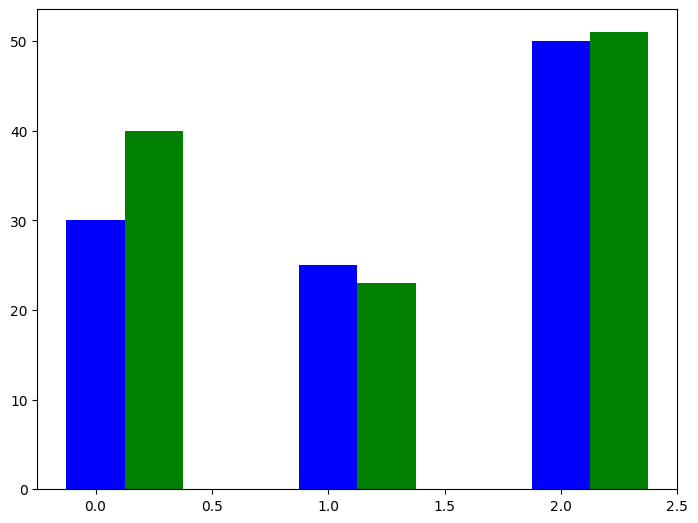

In [40]:
data = [[30, 25, 50],
[40, 23, 51],
[35, 22, 45]]
X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)


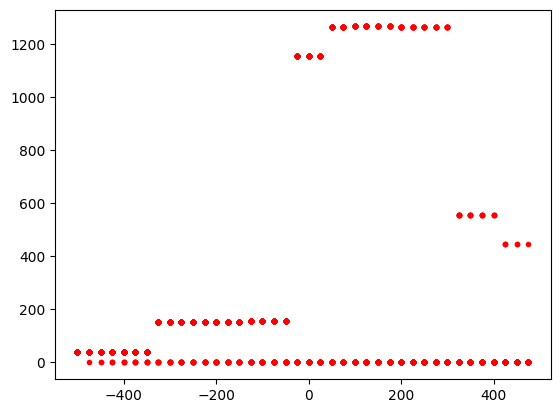

In [62]:
dates = np.arange(-500,500, 25)
no_roman_places = np.zeros_like(dates)
for i, date in enumerate(dates):
    no_roman_places[i] = len(Roman_full[(Roman_full['Start_Date']<=date) & (Roman_full['End_Date']>=date)])

    plt.plot(dates, no_roman_places, 'r.')


In [74]:

Roman_full = Roman_full[(Roman_full['Start_Date']>-350) & (Roman_full['Start_Date']<500)]
roman_480 = Roman_full[Roman_full['End_Date']>=480]


In [20]:
lons_117AD = Roman_full[(Roman_full['Start_Date']<=117) & (Roman_full['End_Date']>=117)]['long']
lats_117AD = Roman_full[(Roman_full['Start_Date']<=117) & (Roman_full['End_Date']>=117)]['lat']
lons_480AD = Roman_full[(Roman_full['Start_Date']<=480) & (Roman_full['End_Date']>=480)]['long']
lats_480AD = Roman_full[(Roman_full['Start_Date']<=480) & (Roman_full['End_Date']>=480)]['lat']
lons_both = Roman_full[(Roman_full['Start_Date']<=117) & (Roman_full['End_Date']>=480)]['long']
lat_both = Roman_full[(Roman_full['Start_Date']<=117) & (Roman_full['End_Date']>=480)]['lat']

c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Joe\AppData\Local\Programs\Python\Python311\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


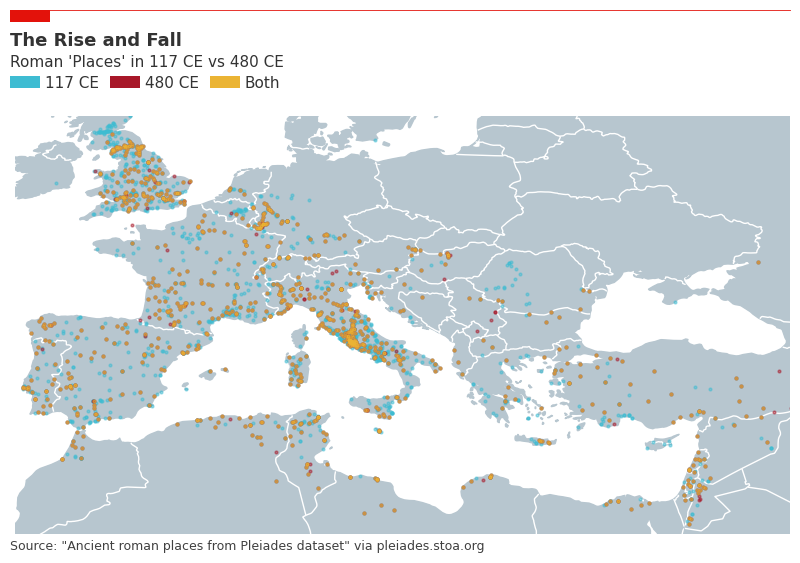

In [21]:
#### THINGS TO DO
## ADD MAJOR CITY NAMES

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree()) ## CAN change type of projection

### This plots the map plot


ax.add_feature(cfeature.LAND, color = '#B7C6CF', zorder = 1)
ax.add_feature(cfeature.BORDERS, color = 'white', zorder = 2)


ax.scatter(lons_117AD, lats_117AD, s=4 , c ='#3EBCD2' ,transform=ccrs.PlateCarree(), zorder = 3, alpha = .5)
ax.scatter(lons_480AD, lats_480AD, s=4,c ='#A81829' ,transform=ccrs.PlateCarree(), zorder = 4, alpha = .5)
ax.scatter(lons_both, lat_both, s=4, c ='#EBB434' ,transform=ccrs.PlateCarree(), zorder = 5, alpha = .5)
ax.axis('off')
ax.set_extent([-10, 42, 57, 29], crs=ccrs.PlateCarree())


# Add in line and tag
ax.plot([0.12, .9],                 # Set width of line
        [1.02, 1.02],                # Set height of line
        transform=fig.transFigure,   # Set location relative to plot
        clip_on=False, 
        color='#E3120B', 
        linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,1.02),                # Set location of rectangle by lower left corder
                           0.04,                       # Width of rectangle
                           -0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#E3120B', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))



# Add in title and subtitle
ax.text(x=0.12, y=.96, s="The Rise and Fall", transform=fig.transFigure, ha='left', fontsize=13, weight='bold', alpha=.8)
ax.text(x=0.12, y=.925, s="Roman \'Places\' in 117 CE vs 480 CE", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

# Set source text
ax.text(x=0.12, y=.12, s="""Source: "Ancient roman places from Pleiades dataset" via pleiades.stoa.org""", transform=fig.transFigure, ha='left', fontsize=9, alpha=.75)

## ADD legend

ax.add_patch(plt.Rectangle((0.12,0.89),                # Set location of rectangle by lower left corder
                           0.03,                       # Width of rectangle
                           0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#3EBCD2', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
ax.add_patch(plt.Rectangle((0.22,0.89),                # Set location of rectangle by lower left corder
                           0.03,                       # Width of rectangle
                           0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#A81829', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))
ax.add_patch(plt.Rectangle((0.32,0.89),                # Set location of rectangle by lower left corder
                           0.03,                       # Width of rectangle
                           0.02,                      # Height of rectangle. Negative so it goes down.
                           facecolor='#EBB434', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

ax.text(x=0.155, y=.89, s="117 CE", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=0.255, y=.89, s="480 CE", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)
ax.text(x=0.355, y=.89, s="Both", transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)


# Show the plot
plt.show()